## Tracy Owusu 
### 500819150

## Table of context

1. [Scatterplot en Regressie analyse](#Scatterplot)
2. [Normaal verdeling](#Normaal)
3. [ANOVA](#ANOVA)
4. [Correlatiematrix](#Correlatiematrix)
5. [Normaliseren](#Normaliseren)
6. [Z-scores en Standaardafwijking](#Z-scores)

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import f_oneway

Voor de volgende statische toetsen gebruik ik een dataset over de kwalititeit van melk. 

Deze dataset heeft de labels pH, Temprature, Taste, Odor, Fat, Turbidity, Colour en Grade. De pH geeft gewoon de pH waarde aan. De temperatuur is aangegeven in celsius.
De taste, odor, fat en turbidity zijn aangegeven met een 1 of 0. Hierbij werkt de criteria dat als ze voldoen aan de optimale omstandigheden krijgen ze een 1, anders 0. 
Waar de kleuren exact voor staan is niet bij de dataset gemeld. Ik denk zelf dat de kleuren allemaal rgb zijn en dat het aangegeven getal bij elke letter hoort. Bijvoorbeeld met 254 is de rgb(254, 254, 254) en bij 250  de rgb(254, 254, 254).

Voor deze dataset wil ik graag de grade oftewel kwaliteit van melk voorspellen.

In [17]:
data=pd.read_csv('milknew.csv')
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


## Scatterplot en Regressie analyse
Een scatterplot is een diagram waar elke data is gerepresenteerd als een punt en  de regressie analyse wordt er verbanden tussen variablen te vinden. De volgende plot toont de correlatie tussen de tempratuur en de ph waarde van melk. Ik probeerde de samenhang tussen temperatuur en ph waarde te analyseren. Aangezien de data op een constante manier geplot is, is er het moeilijk om de conclusie te trekken dat temperatuur effect heeft op de pH waarde. 

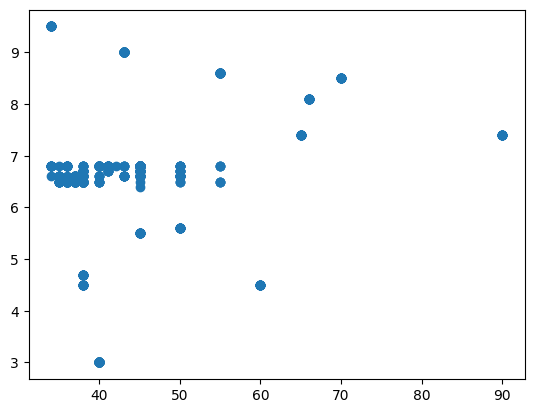

In [18]:
plt.scatter(data['Temprature'], data['pH'])
plt.show()

## Normaal verdeling
De normaal verdeling is een vorm die data presenteert door de kansen van waardes te rangschikken en te verdelen aan de hand van het gemiddelde. 

Ik probeerde met de normaal verdeling te checken hoe verschillend de temperaturen van het graden melk kan zijn om te zien of de temperatuur een rol heeft. Ondanks de overlapping, kan ik wel concluderen dat bij een lagere kwaliteit dat het temperatuur vaker hoger ligt.

In [19]:
low = data[data.Grade == 'low']
medium =  data[data.Grade == 'medium']
high =  data[data.Grade == 'high']

lm = statistics.mean(low['Temprature'])
mm = statistics.mean(medium['Temprature'])
hm = statistics.mean(high['Temprature'])

lsd = statistics.stdev(low['Temprature'])
msd = statistics.stdev(medium['Temprature'])
hsd = statistics.stdev(high['Temprature'])

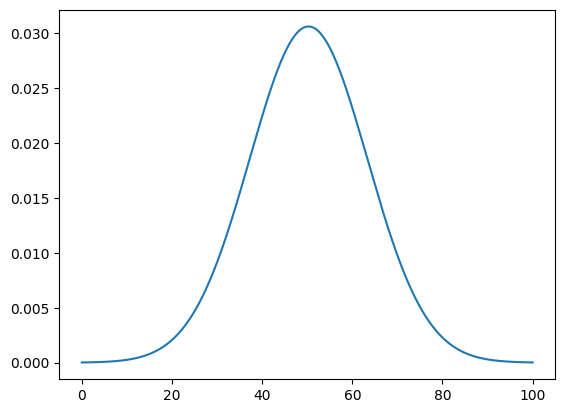

In [20]:
xl = np.arange(0, 100, 0.001)
  
plt.plot(xl, norm.pdf(xl, lm, lsd))
plt.show()

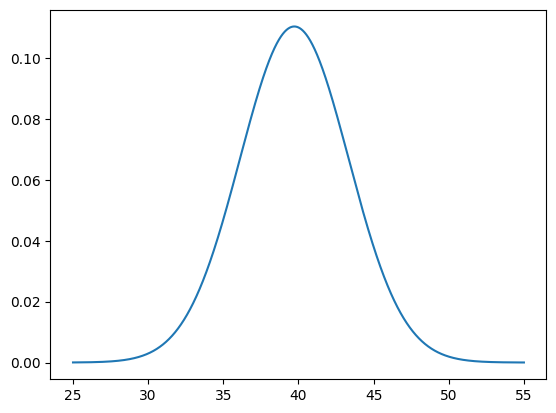

In [21]:
xm = np.arange(25, 55, 0.001)
plt.plot(xm, norm.pdf(xm, mm, msd), label='medium')
plt.show()

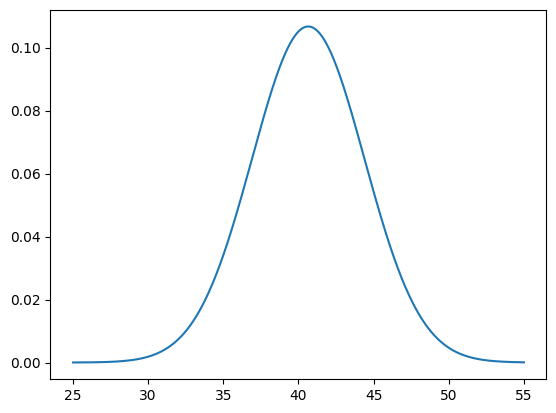

In [22]:
xh = np.arange(25, 55, 0.001)
plt.plot(xh, norm.pdf(xh, hm, hsd), label='high')
plt.show()

## ANOVA

Anova test is een test waarbij het verschil van de gemiddeldes van meerdere groepen worden vergeleken. Ik gebruik de anova test om gemiddeldes tussen de ph waardes van de verschillende groepen te checken. Ik krijg hier een p-waarde van ongeveer 0.64. Hierbij kan ik de nul hypothese fout stellen, omdat het hoger is 0.05. Ik kan dus de conclusie trekken dat gemiddeldes pH waardes voor elk categorie genoeg verschil is.

In [23]:
f_oneway(low['pH'], medium['pH'], high['pH'])

F_onewayResult(statistic=0.44565627272004765, pvalue=0.6405242474528355)

## Correlatiematrix

Met een correlatie matrix kan je gegevens samenvatten om patronen tussen verschillende groepen te zien

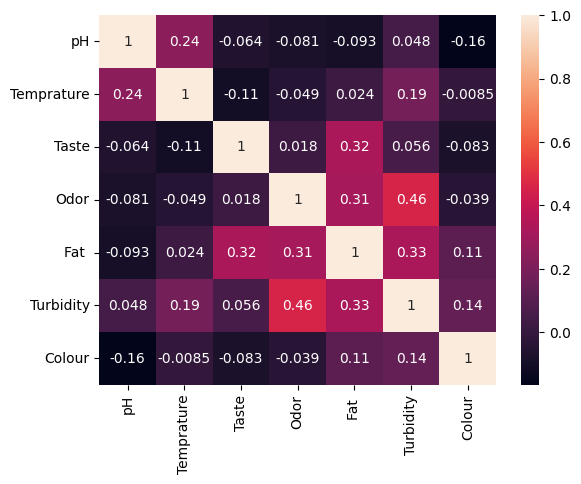

In [24]:
sns.heatmap(data.corr(), annot = True)
plt.show()

## Normaliseren
Het doel van normalisatie is ervoor zorgen dat de kenmerken in de data dezelfde schaal hebben.

In [25]:
# dit is min-max normalisatie
min_val = np.min(data['Temprature'])
max_val = np.max(data['Temprature'])
norm_data = (data['Temprature'] - min_val) / (max_val - min_val)
print(norm_data)

0       0.017857
1       0.035714
2       0.642857
3       0.000000
4       0.053571
          ...   
1054    0.196429
1055    0.071429
1056    0.107143
1057    0.160714
1058    0.375000
Name: Temprature, Length: 1059, dtype: float64



## Z-scores en Standaardafwijking
De Z-score geeft aan hoeveel een waarde van het gemiddelde afzit. De standaardafwijking geeft de mate van de spreiding aan.